<a href="https://colab.research.google.com/github/rishiguptha/PoliticalSentimentAnalysis/blob/main/PoliticalSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Import library to hide warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tweets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/PoliticalTweets.csv')
tweets.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [ ]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.replace('amp', '')
    return text

In [ ]:
tweets['CleanedTweet'] = tweets['Tweet'].apply(clean_text)
tweets.head()

,Party,Handle,Tweet,CleanedTweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...","Today, Senate Dems vote to SaveTheInternet. Pr..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,: Winter Haven resident / Alta Vista teacher i...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,: . noted that Hurricane Maria has left approx...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,: Meeting with . Thanks for taking the time t...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,: Hurricane season starts on June 1st; Puerto ...


In [ ]:
def find_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def find_polarity(text):
    return TextBlob(text).sentiment.polarity

def classify_polarity(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
def classify_subjectivity(score):
    if score == 0:
        return 'Not Subjective'
    else:
        return 'Subjective'

In [ ]:
tweets['Subjectivity'] = tweets['CleanedTweet'].apply(find_subjectivity)
tweets['Polarity'] = tweets['CleanedTweet'].apply(find_polarity)

In [ ]:
tweets['Classify_S'] = tweets['Subjectivity'].apply(classify_subjectivity)
tweets['Classify_P'] = tweets['Polarity'].apply(classify_polarity)

In [ ]:
tweets.head()

,Party,Handle,Tweet,CleanedTweet,Subjectivity,Polarity,Classify_S,Classify_P
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...","Today, Senate Dems vote to SaveTheInternet. Pr...",0.7,0.4,Subjective,Positive
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,: Winter Haven resident / Alta Vista teacher i...,0.0,0.0,Not Subjective,Neutral
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,: . noted that Hurricane Maria has left approx...,0.3,-0.2,Subjective,Negative
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,: Meeting with . Thanks for taking the time t...,0.2,0.2,Subjective,Positive
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,: Hurricane season starts on June 1st; Puerto ...,0.0,0.0,Not Subjective,Neutral


In [ ]:
democract_tweets = tweets[tweets['Party'] == 'Democrat']
republican_tweets = tweets[tweets['Party'] == 'Republican']

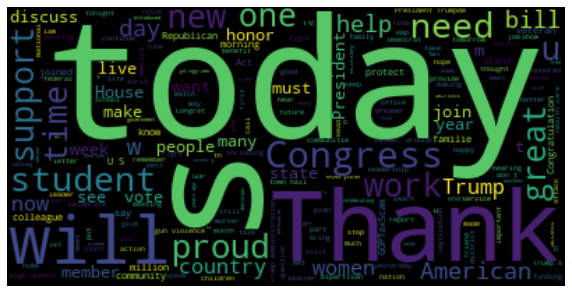

In [ ]:
words = ' '.join([tweet for tweet in democract_tweets['CleanedTweet']])
word_cloud = WordCloud(random_state = 42, max_font_size = 120).generate(words)

plt.figure(figsize=(10, 10))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

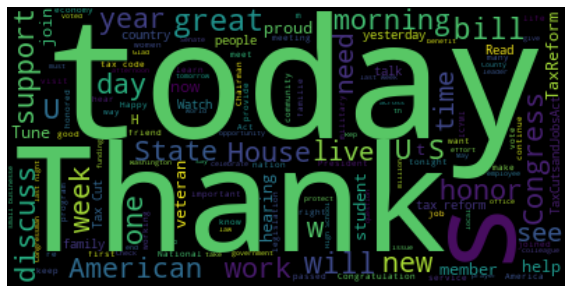

In [ ]:
words = ' '.join([tweet for tweet in republican_tweets['CleanedTweet']])
word_cloud = WordCloud(random_state = 42, max_font_size = 120).generate(words)

plt.figure(figsize=(10, 10))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

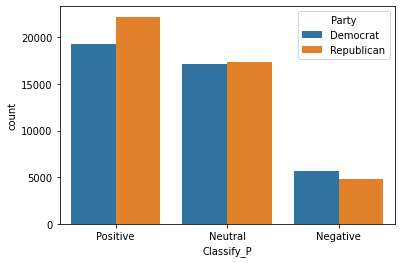

In [ ]:
sns.countplot(x = "Classify_P", hue = 'Party', data = tweets)

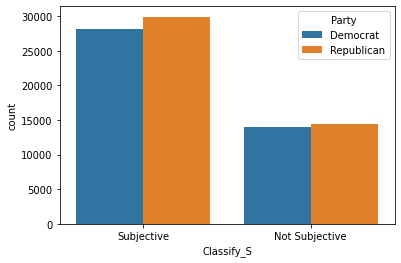

In [ ]:
sns.countplot(x = "Classify_S", hue = 'Party', data = tweets)

In [ ]:
dt_avg_sentiment = democract_tweets['Polarity'].mean()
dt_pct_subjective = democract_tweets[democract_tweets['Classify_S'] == 'Subjective'].shape[0] / democract_tweets.shape[0] * 100
rt_avg_sentiment = republican_tweets['Polarity'].mean()
rt_pct_subjective = republican_tweets[republican_tweets['Classify_S'] == 'Subjective'].shape[0] / republican_tweets.shape[0] * 100

print(f"Average Democrat Sentiment: {dt_avg_sentiment:.2f}, Demoract Subjective Tweet Percentage: {dt_pct_subjective:.2f}%")
print(f"Average Republican Sentiment: {rt_avg_sentiment:.2f}, Republican Subjective Tweet Percentage: {rt_pct_subjective:.2f}%")

Average Democrat Sentiment: 0.14, Demoract Subjective Tweet Percentage: 66.78%
Average Republican Sentiment: 0.17, Republican Subjective Tweet Percentage: 67.39%
